In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
df_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [3]:
df_a['date'] = pd.to_datetime(df_a['date'], format='%Y-%m-%d')

In [4]:
df_b['date'] = pd.to_datetime(df_b['date'], format='%Y-%m-%d')

In [5]:
df_a = df_a.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index()

In [6]:
# df_a[df_a['date']=='2020-11-08']

In [7]:
df_b = df_b.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index()

In [8]:
df_a['cum_users_count'] = df_a['cid'].cumsum()
df_a['cum_users_transactions'] = df_a['transactions'].cumsum()
df_a['cum_users_revenue'] = df_a['revenue'].cumsum()

In [9]:
df_b['cum_users_count'] = df_b['cid'].cumsum()
df_b['cum_users_transactions'] = df_b['transactions'].cumsum()
df_b['cum_users_revenue'] = df_b['revenue'].cumsum()
df_b

,date,cid,transactions,revenue,cum_users_count,cum_users_transactions,cum_users_revenue
0,2020-11-06,2499,19,996645,2499,19,996645
1,2020-11-07,2804,19,555499,5303,38,1552144
2,2020-11-08,3291,24,3044842,8594,62,4596986
3,2020-11-09,3062,25,1285836,11656,87,5882822
4,2020-11-10,3072,30,2414726,14728,117,8297548
5,2020-11-11,3208,22,3555727,17936,139,11853275
6,2020-11-12,3494,25,915653,21430,164,12768928
7,2020-11-13,3606,37,1703475,25036,201,14472403
8,2020-11-14,3276,34,2369998,28312,235,16842401
9,2020-11-15,3919,27,1147144,32231,262,17989545


In [10]:
# df_a['c_b'] = df_a['revenue']/df_a['cum_users_revenue']*100
# df_a['c_c'] = df_a['cum_users_revenue']/df_a['cum_users_transactions']

In [11]:
# df_b['c_b'] = df_b['revenue']/df_b['cum_users_revenue']*100
# df_b['c_c'] = df_b['cum_users_revenue']/df_b['cum_users_transactions']

In [12]:
df_a['c_c'] = df_a['cum_users_transactions'] / df_a['cum_users_count']*100
df_a['c_ch'] = df_a['cum_users_revenue'] / df_a['cum_users_transactions']
df_a

,date,cid,transactions,revenue,cum_users_count,cum_users_transactions,cum_users_revenue,c_c,c_ch
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,52423.917355


In [13]:
df_b['c_c'] = df_b['cum_users_transactions'] / df_b['cum_users_count']*100
df_b['c_ch'] = df_b['cum_users_revenue'] / df_b['cum_users_transactions']

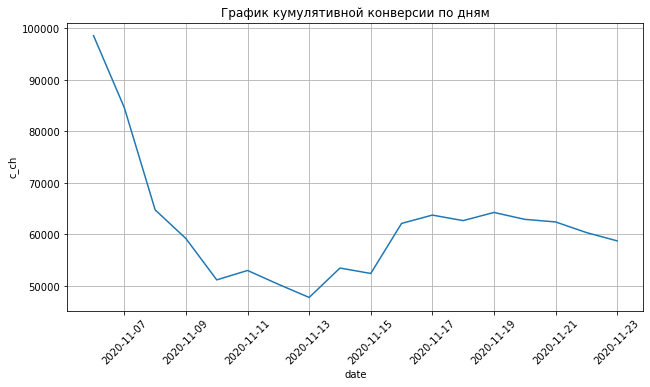

In [14]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1, 1, 1, 1])
sns.lineplot(x='date', y='c_ch', data=df_a, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

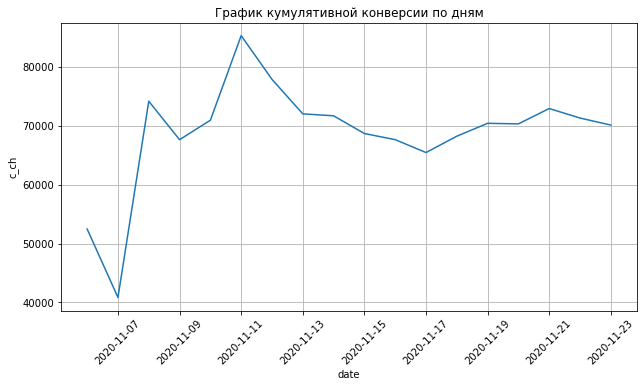

In [15]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1, 1, 1, 1])
sns.lineplot(x='date', y='c_ch', data=df_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);